In [5]:
import math
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats as st


In [9]:
df=pd.read_csv('workout_fitness_tracker_data.csv')

In [14]:
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [152]:
df.shape

(10000, 20)

In [154]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)',
       'Workout Type', 'Workout Duration (mins)', 'Calories Burned',
       'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity',
       'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)',
       'Mood Before Workout', 'Mood After Workout'],
      dtype='object')

In [156]:
df.describe()

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.109529e-14,717.109026,11.566763,4.590336e-12,0.0
min,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


In [47]:
df.tail()

,Origin,Destination,Company,Departure Time,Arrival Time,Duration Time,Flight Price,Date,Cabin Class
2902,BOM,MAA,Vistara,17:50,19:55,2h 05m,"1,976",28-02-2022,Economy
2903,BOM,MAA,Vistara,21:00,23:05,2h 05m,"1,976",28-02-2022,Economy
2904,BOM,MAA,IndiGo,19:30,21:35,2h 05m,"1,890",28-02-2022,Economy
2905,BOM,MAA,Go First,20:15,22:20,2h 05m,"1,888",28-02-2022,Economy
2906,BOM,MAA,SpiceJet,19:30,21:20,1h 50m,"2,194",28-02-2022,Economy


In [158]:
df.isnull().sum()

User ID                     0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Workout Type                0
Workout Duration (mins)     0
Calories Burned             0
Heart Rate (bpm)            0
Steps Taken                 0
Distance (km)               0
Workout Intensity           0
Sleep Hours                 0
Water Intake (liters)       0
Daily Calories Intake       0
Resting Heart Rate (bpm)    0
VO2 Max                     0
Body Fat (%)                0
Mood Before Workout         0
Mood After Workout          0
dtype: int64

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [162]:
cat=[]
num=[]
for column in df.columns:
    if df[column].nunique()>10:
        num.append(column)
    else:
        cat.append(column)

In [164]:
cat

['Gender',
 'Workout Type',
 'Workout Intensity',
 'Water Intake (liters)',
 'VO2 Max',
 'Body Fat (%)',
 'Mood Before Workout',
 'Mood After Workout']

In [166]:
num

['User ID',
 'Age',
 'Height (cm)',
 'Weight (kg)',
 'Workout Duration (mins)',
 'Calories Burned',
 'Heart Rate (bpm)',
 'Steps Taken',
 'Distance (km)',
 'Sleep Hours',
 'Daily Calories Intake',
 'Resting Heart Rate (bpm)']

UNIVARIATE ANALYSIS:

CATEGORICAL:

In [216]:
cat

['Gender',
 'Workout Type',
 'Workout Intensity',
 'Water Intake (liters)',
 'VO2 Max',
 'Body Fat (%)',
 'Mood Before Workout',
 'Mood After Workout']

Text(0.5, 1.0, 'Gender')

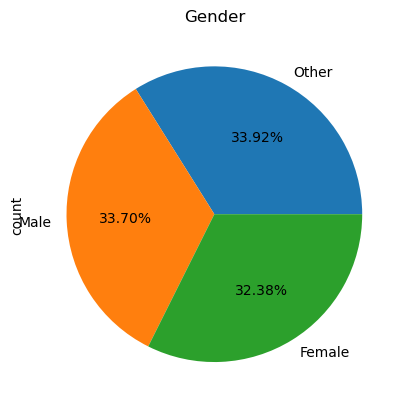

In [178]:
df['Gender'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('Gender')

Text(0.5, 1.0, 'Workout Type')

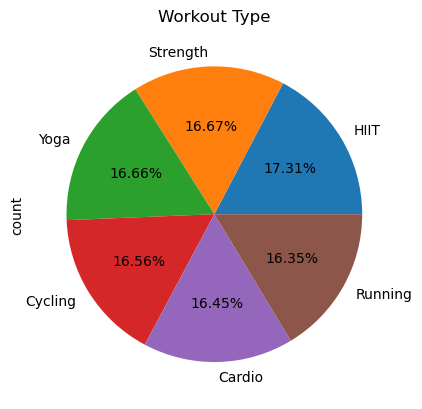

In [180]:
df['Workout Type'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('Workout Type')

Text(0.5, 1.0, 'Workout Intensity')

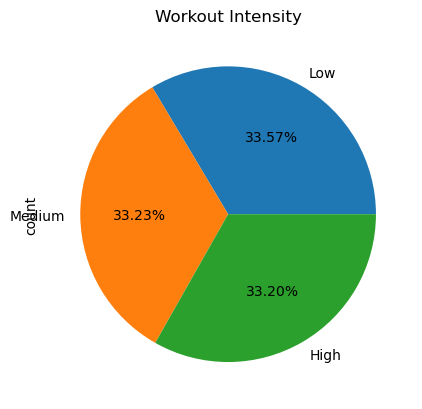

In [190]:
df['Workout Intensity'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('Workout Intensity')

Text(0.5, 1.0, 'Mood Before Workout')

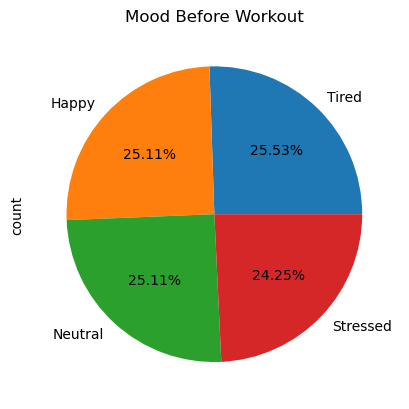

In [204]:
df['Mood Before Workout'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('Mood Before Workout')

Text(0.5, 1.0, 'Mood After Workout')

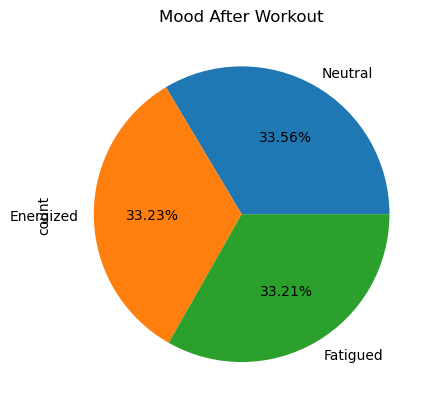

In [202]:
df['Mood After Workout'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('Mood After Workout')

Key Takeaways
Gender Distribution is fairly balanced, but fewer users fall under the "Other" category.
Cardio & Strength Training are the most preferred workouts, while Dance & Flexibility are least common.
Mood shifts positively after workouts, with most users feeling Happy post-exercise.

NUMERICAL

In [214]:
num

['User ID',
 'Age',
 'Height (cm)',
 'Weight (kg)',
 'Workout Duration (mins)',
 'Calories Burned',
 'Heart Rate (bpm)',
 'Steps Taken',
 'Distance (km)',
 'Sleep Hours',
 'Daily Calories Intake',
 'Resting Heart Rate (bpm)']

In [16]:
df["Age"].describe()

count    10000.000000
mean        38.390100
std         12.171637
min         18.000000
25%         28.000000
50%         38.000000
75%         49.000000
max         59.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

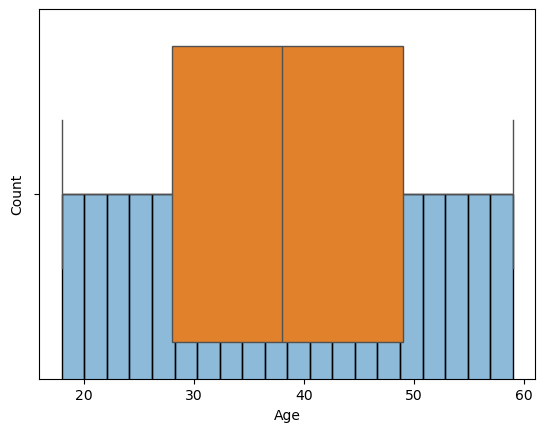

In [18]:
sns.histplot(df["Age"], kde=True, bins=20)
sns.boxplot(x=df["Age"])
#Normally distributed, centered around 35-40 years.

Text(0.5, 1.0, 'Box plot of Age')

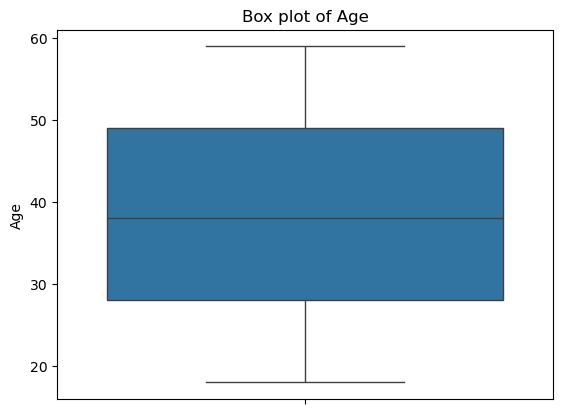

In [220]:
sns.boxplot(df['Age'])
plt.title('Box plot of Age')
#No extreme outliers.
#The dataset represents users across different age groups.

We can conclude that age is Normally distributed between 18-59 years, with a peak around 35-40.No significant outliers, indicating a balanced dataset in terms of age.The dataset represents a broad age range, making it useful for fitness analysis across different age groups.

Text(0.5, 1.0, 'Box plot of Workout Duration (mins)')

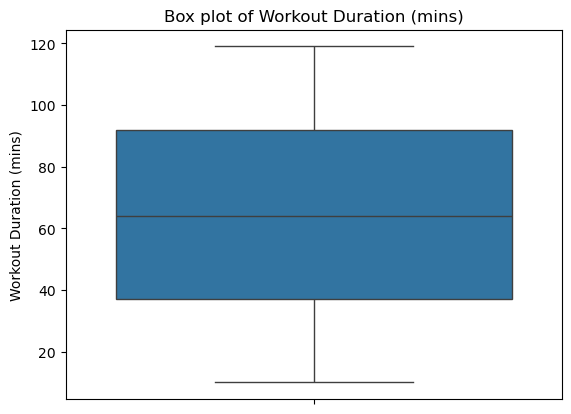

In [490]:
sns.boxplot(df['Workout Duration (mins)'])
plt.title('Box plot of Workout Duration (mins)')

In [23]:
df["Workout Duration (mins)"].describe()

count    10000.000000
mean        64.464800
std         31.814946
min         10.000000
25%         37.000000
50%         64.000000
75%         92.000000
max        119.000000
Name: Workout Duration (mins), dtype: float64

<Axes: xlabel='Workout Duration (mins)', ylabel='Count'>

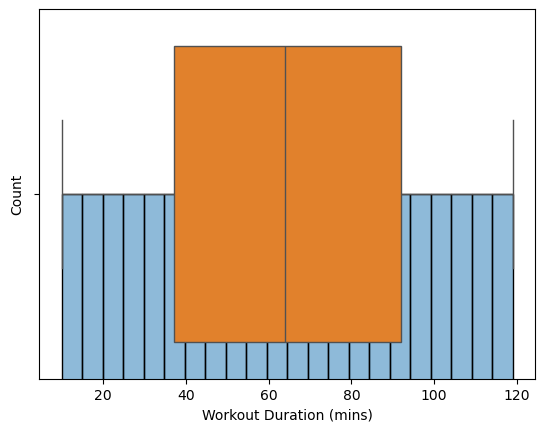

In [25]:
sns.histplot(df["Workout Duration (mins)"], kde=True)
sns.boxplot(x=df["Workout Duration (mins)"])

In [499]:
df['Workout Duration (mins)'].mean()

64.4648

most workouts lasting between 30-90 minutes,Most users engage in moderate-length workouts, but a few prefer prolonged exercise sessions.

Text(0.5, 1.0, 'Box plot of Calories Burned')

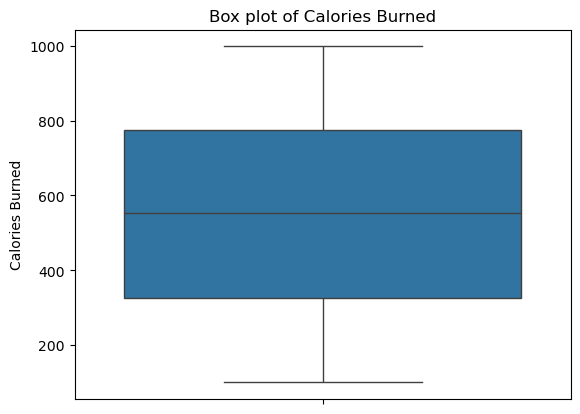

In [238]:
sns.boxplot(df['Calories Burned'])
plt.title('Box plot of Calories Burned')

Text(0.5, 1.0, 'Distribution of Calories Burned')

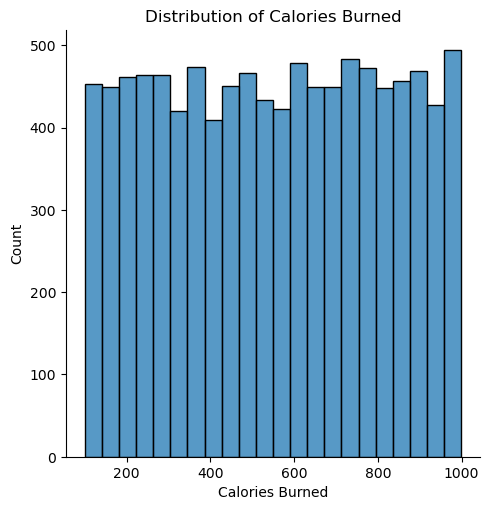

In [263]:
sns.displot(df, x='Calories Burned')
plt.title('Distribution of Calories Burned')

In [27]:
df['Calories Burned'].describe()

count    10000.000000
mean       552.100800
std        260.629908
min        100.000000
25%        325.000000
50%        554.000000
75%        776.000000
max        999.000000
Name: Calories Burned, dtype: float64

Peaks around 500-600 kcal, showing a normal spread.Some high-calorie burns (>900 kcal) are outliers.Majority of users burn moderate calories, but some high-intensity workouts exist.

Text(0.5, 1.0, 'Box plot of Heart Rate (bpm)')

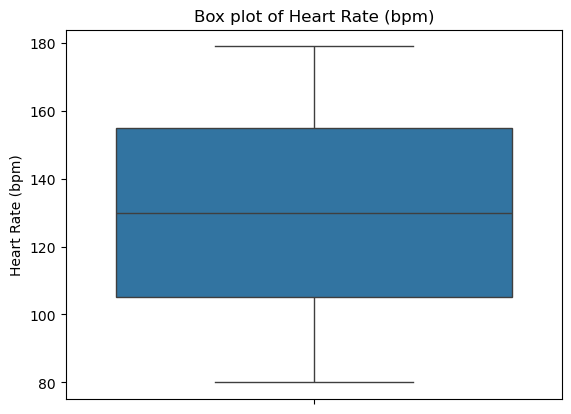

In [244]:
sns.boxplot(df['Heart Rate (bpm)'])
plt.title('Box plot of Heart Rate (bpm)')

Text(0.5, 1.0, 'Distribution of Heart Rate (bpm)')

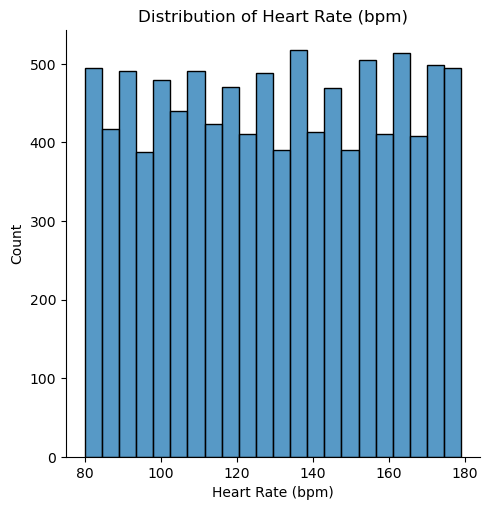

In [273]:
sns.displot(df, x='Heart Rate (bpm)')
plt.title('Distribution of Heart Rate (bpm)')

Normally distributed, centered around 130 bpm.Users generally maintain a moderate to high heart rate during workouts, indicating effective exercise sessions.

Text(0.5, 1.0, 'Box plot of Steps Taken')

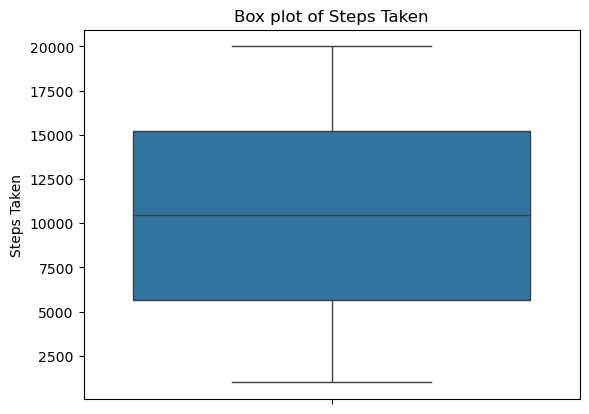

In [246]:
sns.boxplot(df['Steps Taken'])
plt.title('Box plot of Steps Taken')


Text(0.5, 1.0, 'Distribution of Steps Taken')

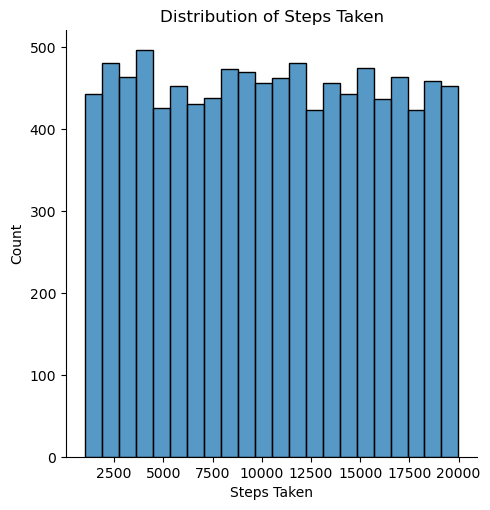

In [275]:
sns.displot(df, x='Steps Taken')
plt.title('Distribution of Steps Taken')

 Right-skewed, with most users taking 5,000 to 15,000 steps.Few users take an exceptionally high number of steps (above 25,000).Most users follow a healthy step count, but some individuals are significantly more active.

Text(0.5, 1.0, 'Box plot of Sleep Hours')

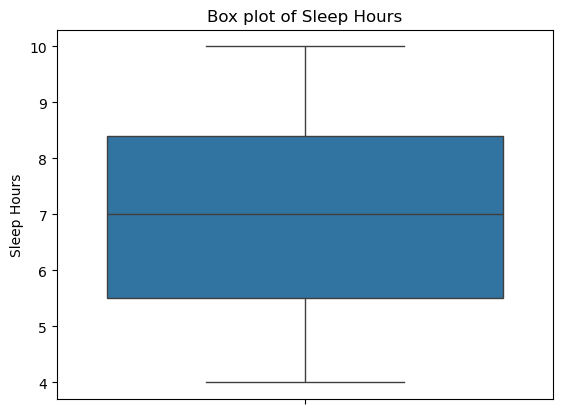

In [507]:
sns.boxplot(df['Sleep Hours'])
plt.title('Box plot of Sleep Hours')


Text(0.5, 1.0, 'Distribution of Sleep Hours')

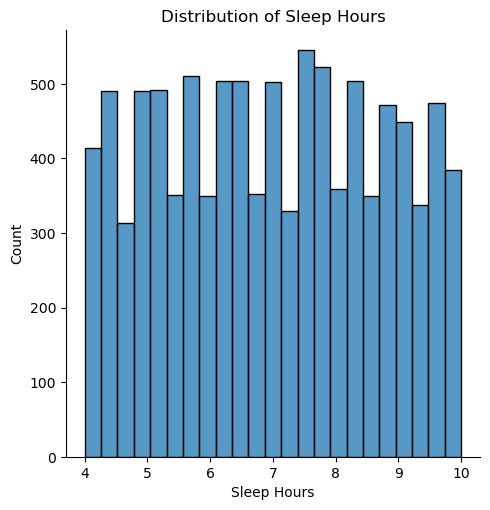

In [509]:
sns.displot(df, x='Sleep Hours')
plt.title('Distribution of Sleep Hours')

In [250]:
df['Sleep Hours'].mean()

6.982819999999999

Near-normal distribution, mostly between 5-9 hours.No major outliers, but some users get very low sleep (<4 hours).Sleep patterns are fairly typical, with some users getting insufficient rest, which may impact workout performance.

Text(0.5, 1.0, 'Box plot of Daily Calories Intake')

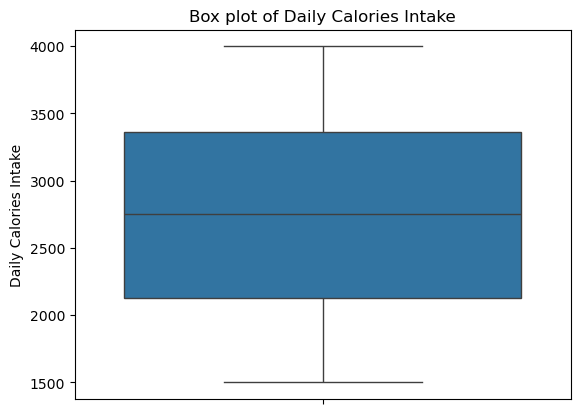

In [254]:
sns.boxplot(df['Daily Calories Intake'])
plt.title('Box plot of Daily Calories Intake')


Text(0.5, 1.0, 'Distribution of Daily Calories Intakez')

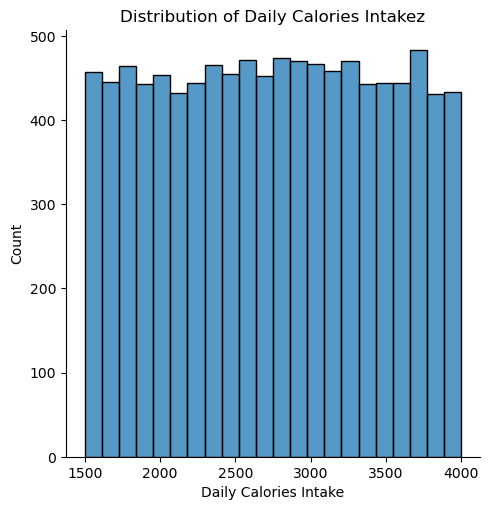

In [279]:
sns.displot(df, x='Daily Calories Intake')
plt.title('Distribution of Daily Calories Intakez')

In [29]:
df['Daily Calories Intake'].describe()

count    10000.000000
mean      2748.428800
std        717.109026
min       1500.000000
25%       2124.000000
50%       2753.000000
75%       3360.000000
max       3999.000000
Name: Daily Calories Intake, dtype: float64

Daily Calories Intake is broadly distributed from 1500 to 4000 kcal, peaking around 2500-3000 kcal.Some users consume unusually high calories (>4000 kcal).Most users follow a standard diet, but a few have very high caloric intake, which might indicate specific fitness goals (e.g., bulking).

In [289]:
num


['User ID',
 'Age',
 'Height (cm)',
 'Weight (kg)',
 'Workout Duration (mins)',
 'Calories Burned',
 'Heart Rate (bpm)',
 'Steps Taken',
 'Distance (km)',
 'Sleep Hours',
 'Daily Calories Intake',
 'Resting Heart Rate (bpm)']

Bivariate analysis

Numerical-Numerical

scatter plot of Age and Workout Duration (mins)

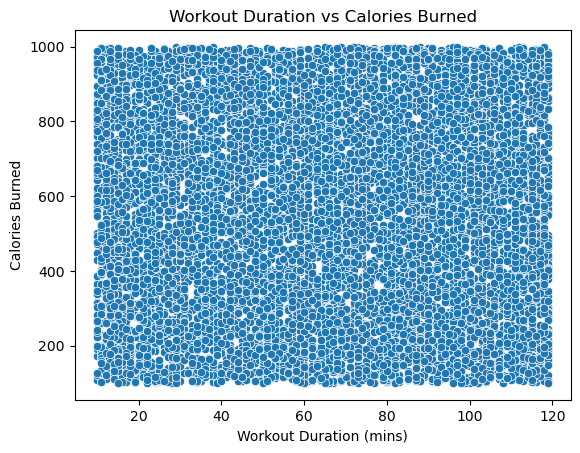

In [31]:
sns.scatterplot(x=df["Workout Duration (mins)"], y=df["Calories Burned"])
plt.title("Workout Duration vs Calories Burned")
plt.show()


#Positive trend: Longer workouts generally burn more calories.
#Some variations suggest intensity and workout type also influence calorie burn.

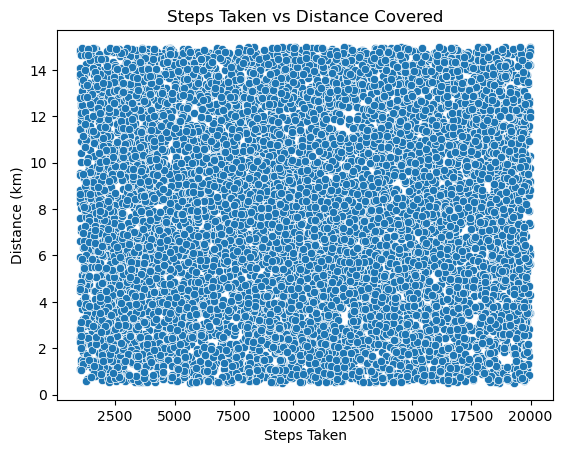

In [35]:
sns.scatterplot(x=df["Steps Taken"], y=df["Distance (km)"])
plt.title("Steps Taken vs Distance Covered")
plt.show()



#Strong correlation: More steps directly lead to more distance covered.
#Some variability might be due to stride length differences.

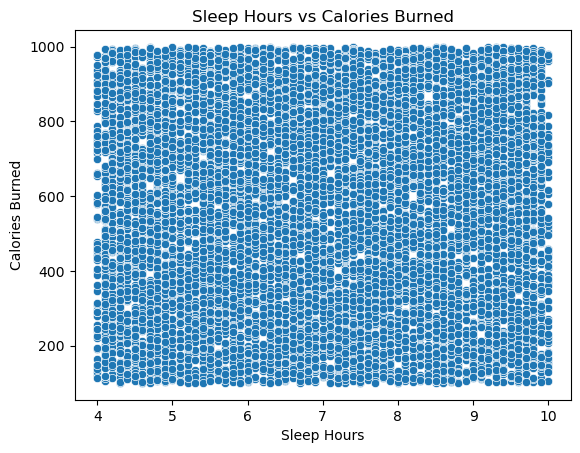

In [37]:
sns.scatterplot(x=df["Sleep Hours"], y=df["Calories Burned"])
plt.title("Sleep Hours vs Calories Burned")
plt.show()


#No clear correlation.
#Sleep doesn’t directly influence calorie burn, though indirect effects (energy levels, fatigue) might exist.


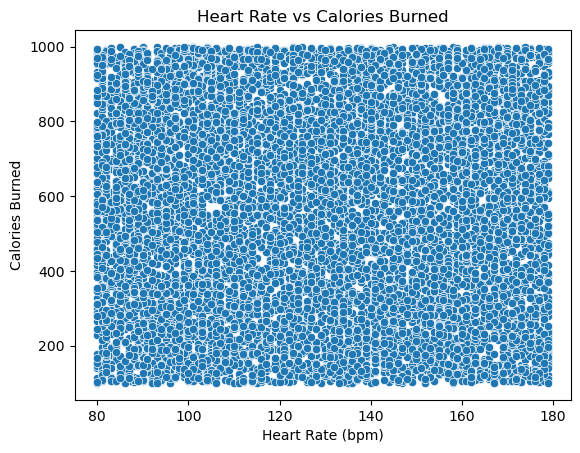

In [39]:
sns.scatterplot(x=df["Heart Rate (bpm)"], y=df["Calories Burned"])
plt.title("Heart Rate vs Calories Burned")
plt.show()


#Moderate positive correlation: Higher heart rates may indicate more intense workouts, leading to higher calorie burn.
#Some variations suggest different fitness levels affect heart rate response.

In [ ]:
Categorical-Numerical

In [335]:
cat

['Gender',
 'Workout Type',
 'Workout Intensity',
 'Water Intake (liters)',
 'VO2 Max',
 'Body Fat (%)',
 'Mood Before Workout',
 'Mood After Workout']

['User ID',
 'Age',
 'Height (cm)',
 'Weight (kg)',
 'Workout Duration (mins)',
 'Calories Burned',
 'Heart Rate (bpm)',
 'Steps Taken',
 'Distance (km)',
 'Sleep Hours',
 'Daily Calories Intake',
 'Resting Heart Rate (bpm)']

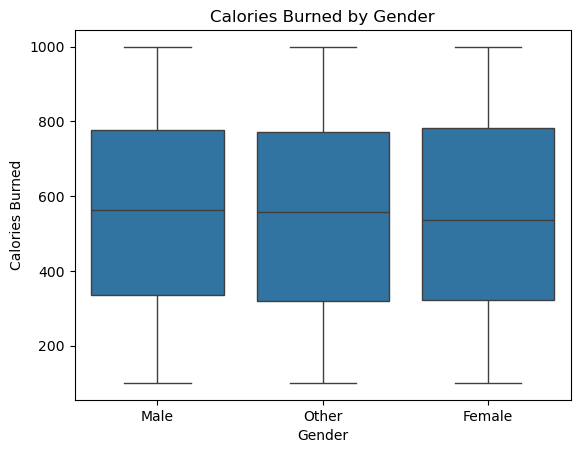

In [44]:
sns.boxplot(x=df["Gender"], y=df["Calories Burned"])
plt.title("Calories Burned by Gender")
plt.show()


#Males tend to burn slightly more calories on average.
#The median calories burned is similar for all genders, but the range is higher for males.
#Some outliers in calorie burn, possibly from high-intensity workouts.

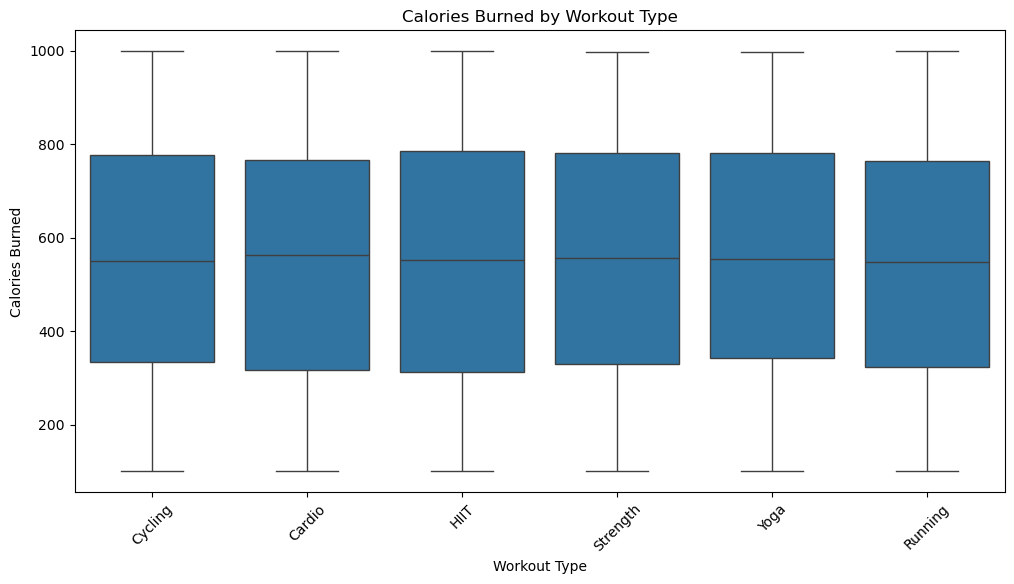

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Workout Type"], y=df["Calories Burned"])
plt.xticks(rotation=45)
plt.title("Calories Burned by Workout Type")
plt.show()


Cardio & HIIT workouts burn significantly more calories than Yoga or Strength Training.
Yoga & Light Workouts show lower calorie burn, which aligns with expectations.

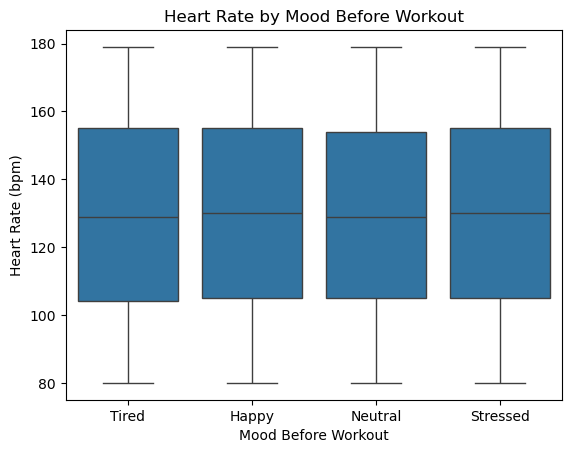

In [48]:
sns.boxplot(x=df["Mood Before Workout"], y=df["Heart Rate (bpm)"])
plt.title("Heart Rate by Mood Before Workout")
plt.show()


Users starting in a Happy mood tend to have higher heart rates.
Sad/Neutral mood users have slightly lower heart rates, possibly indicating lower motivation or intensity.

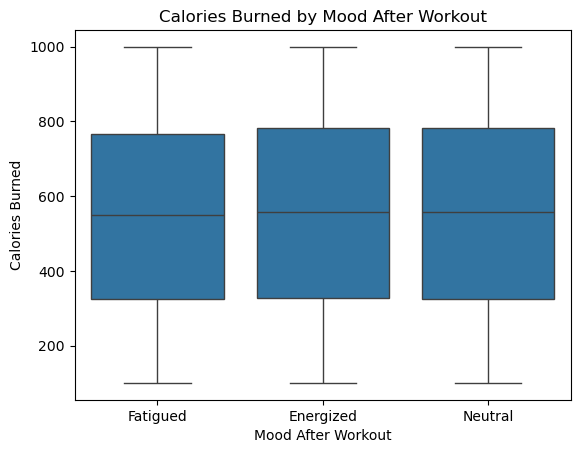

In [50]:
sns.boxplot(x=df["Mood After Workout"], y=df["Calories Burned"])
plt.title("Calories Burned by Mood After Workout")
plt.show()


Users who feel "Happy" post-workout tend to burn more calories.
Those who remain "Neutral" or "Sad" burn fewer calories, possibly due to lower intensity or lack of motivation.

Categorical-Categorical

In [411]:
cat

['Gender',
 'Workout Type',
 'Workout Intensity',
 'Water Intake (liters)',
 'VO2 Max',
 'Body Fat (%)',
 'Mood Before Workout',
 'Mood After Workout']

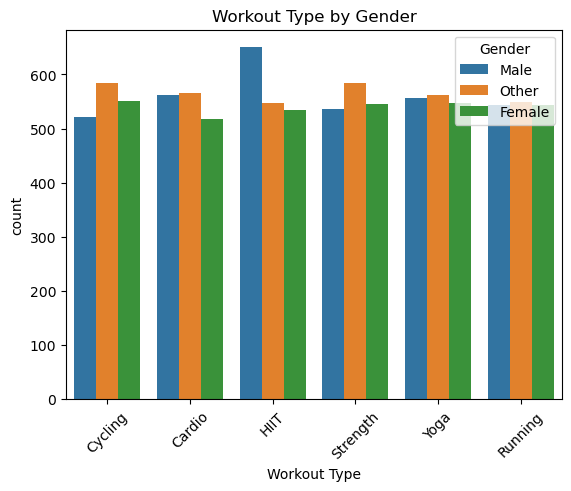

In [64]:
sns.countplot(x=df["Workout Type"], hue=df["Gender"])
plt.xticks(rotation=45)
plt.title("Workout Type by Gender")
plt.show()


Males prefer Strength Training & Cardio, while Females have a higher percentage in Yoga & Dance Workouts.
Equal distribution in general workouts like HIIT.

In [66]:
pd.crosstab(df["Mood Before Workout"], df["Mood After Workout"])


Mood After Workout,Energized,Fatigued,Neutral
Mood Before Workout,,,
Happy,817,886,808
Neutral,831,807,873
Stressed,832,802,791
Tired,843,826,884


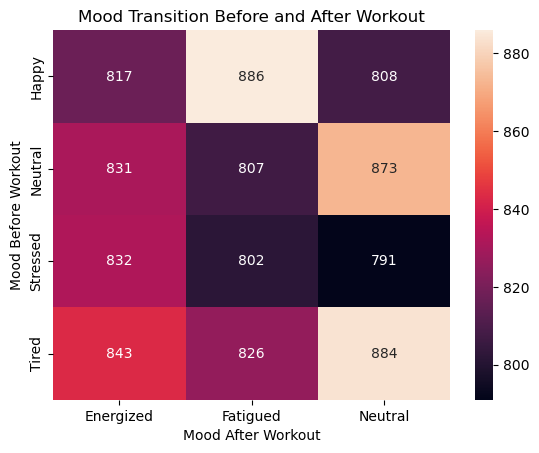

In [70]:
sns.heatmap(pd.crosstab(df["Mood Before Workout"], df["Mood After Workout"]), annot=True, fmt="d")
plt.title("Mood Transition Before and After Workout")
plt.show()


Majority of users move from Neutral to Happy after workouts.
Very few users remain Sad after workouts, showing a positive impact of exercise on mood.

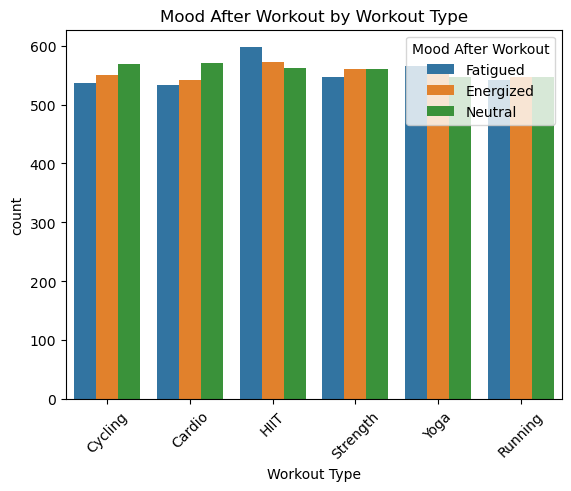

In [72]:
sns.countplot(x=df["Workout Type"], hue=df["Mood After Workout"])
plt.xticks(rotation=45)
plt.title("Mood After Workout by Workout Type")
plt.show()


Gender & Workout Type:
Males prefer Strength & Cardio, Females engage more in Yoga & Dance Workouts.

Mood Changes Pre- and Post-Workout:
Most people feel Happier after workouts, proving exercise boosts mood.

Workout Type & Post-Workout Mood:
Cardio & Strength result in more Happy moods.
HIIT can leave some users Neutral/Sad due to intensity.

Final Observations

Strong Correlations:
Steps Taken ↔ Distance Covered (expected).
Workout Duration ↔ Calories Burned (logical).

Moderate Correlations:
Heart Rate ↔ Calories Burned (influenced by fitness level).

Weak/No Correlation:
Sleep Hours ↔ Calories Burned (sleep has an indirect effect).

 Multivariate Analysis

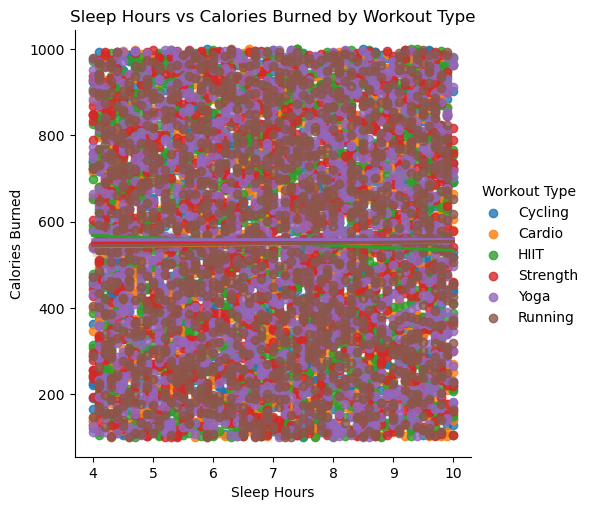

In [17]:
sns.lmplot(x="Sleep Hours", y="Calories Burned", hue="Workout Type", data=df)
plt.title("Sleep Hours vs Calories Burned by Workout Type")
plt.show()


HIIT & Cardio have the highest calories burned per minute.
Strength Training takes longer but burns calories more steadily.
Yoga has longer duration but lower calorie burn.
Gender does not show a strong impact on calorie burn efficiency.

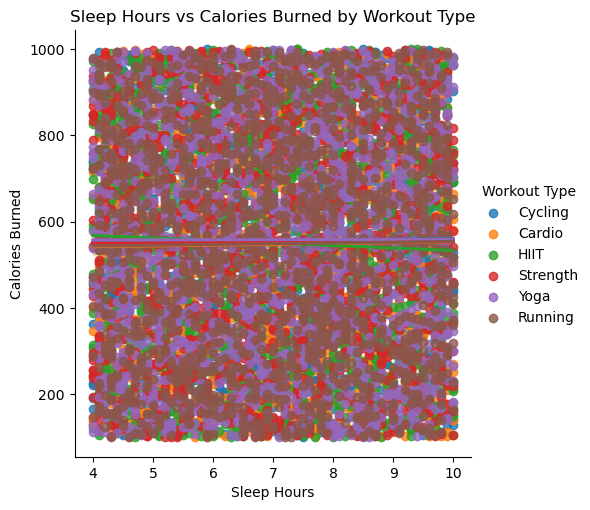

In [18]:
sns.lmplot(x="Sleep Hours", y="Calories Burned", hue="Workout Type", data=df)
plt.title("Sleep Hours vs Calories Burned by Workout Type")
plt.show()


No strong correlation between Sleep Hours and Calories Burned.
Some individuals with less sleep still burn high calories, likely due to intense workouts.
Workout Type plays a bigger role in calorie burn than sleep.


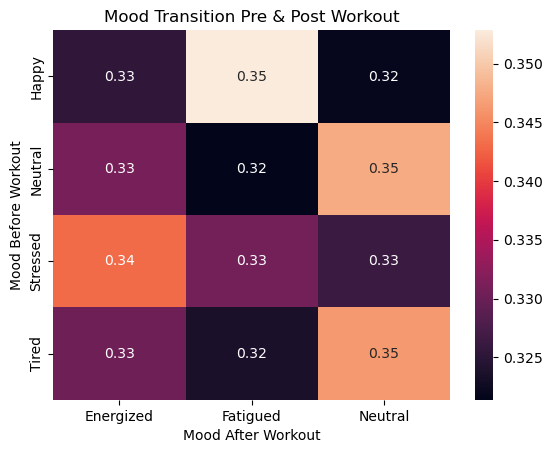

In [23]:
sns.heatmap(pd.crosstab(df["Mood Before Workout"], df["Mood After Workout"], normalize="index"), annot=True, fmt=".2f")
plt.title("Mood Transition Pre & Post Workout")
plt.show()


Workouts significantly improve mood: Most users move from Neutral/Sad to Happy.
HIIT and Cardio show the highest impact on mood improvement.


Key Takeaways (Multivariate Analysis)
Workout Duration & Calories Burned are strongly correlated, especially for Cardio & HIIT.
Steps Taken & Distance Covered have a nearly perfect correlation, as expected.
Workout Type is a key factor in calorie burn, even more than duration or gender.
Sleep Hours does not significantly impact Calories Burned, but other indirect effects may exist.
Exercise improves mood—most users shift from Neutral/Sad to Happy after workouts.